In [105]:
# ws11

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format #

x = [1,2  ,3,3.2,4  ,5,6  ,8.5,7   ,9 ,10,11,12,4.9 ]
y = [1,2.5,3,5.7,4.9,5,5.5,6.3,7.3 ,9 ,11,10,12,11.5]
data = list(zip(x,y))

df = pd.DataFrame(data, columns=['x','y'])
df

,x,y
0,1.00,1.00
1,2.00,2.50
2,3.00,3.00
3,3.20,5.70
4,4.00,4.90
5,5.00,5.00
6,6.00,5.50
7,8.50,6.30
8,7.00,7.30
9,9.00,9.00


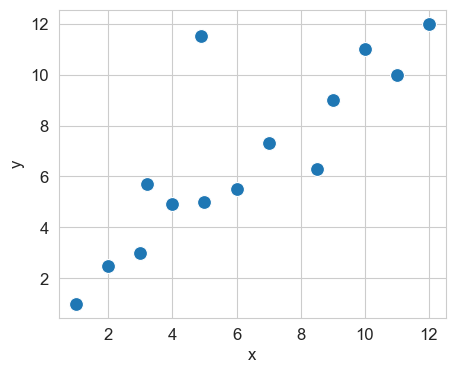

In [106]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':12})

plt.figure(figsize=(5,4))
sns.scatterplot(x='x',y='y',data=df, s=100)
plt.show()

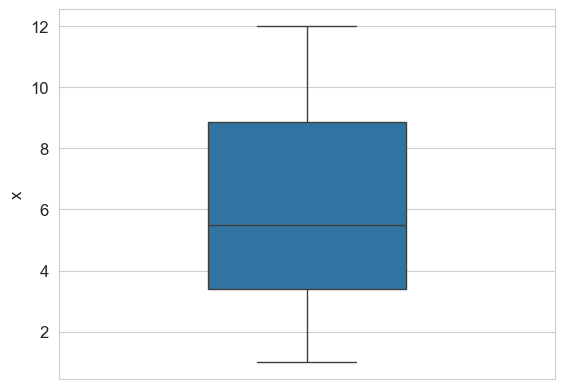

In [107]:
sns.boxplot(df.x, width=0.4)
plt.show()

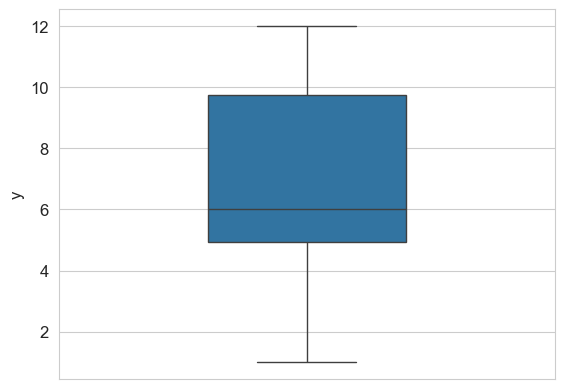

In [108]:
sns.boxplot(df.y, width=0.4)
plt.show()

In [109]:
# ws12
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d_arr = scaler.fit_transform(data)

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.24,
  metric='euclidean',
  min_samples = 3, 
  n_jobs = -1)

clusters = outlier_detection.fit_predict(d_arr)
print('Outliers found:',list(clusters).count(-1))

clusters

Outliers found: 1


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

In [110]:
df['cluster'] = clusters
df['outlier'] = np.where(df.cluster == -1, True, False)
df

,x,y,cluster,outlier
0,1.00,1.00,0,False
1,2.00,2.50,0,False
2,3.00,3.00,0,False
3,3.20,5.70,0,False
4,4.00,4.90,0,False
5,5.00,5.00,0,False
6,6.00,5.50,0,False
7,8.50,6.30,0,False
8,7.00,7.30,0,False
9,9.00,9.00,0,False


In [111]:
df.groupby('cluster').cluster.count()

cluster
-1     1
 0    13
Name: cluster, dtype: int64

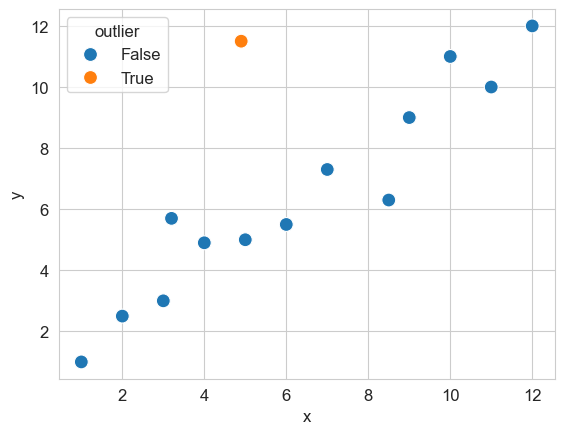

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19040\1250523872.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x',y='y', data=df, style='outlier', palette='Set1', s=100)


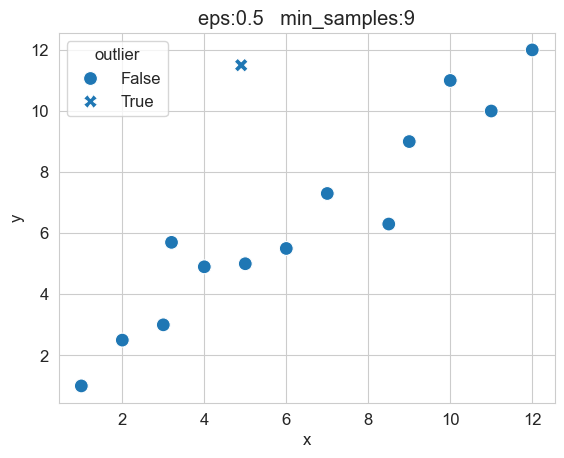

In [112]:
sns.scatterplot(x='x',y='y', data=df, hue='outlier',s=100) # , palette='coolwarm'
plt.show()

sns.scatterplot(x='x',y='y', data=df, style='outlier', palette='Set1', s=100)
plt.title('eps:0.5   min_samples:9')
plt.show()

In [113]:
df

,x,y,cluster,outlier
0,1.00,1.00,0,False
1,2.00,2.50,0,False
2,3.00,3.00,0,False
3,3.20,5.70,0,False
4,4.00,4.90,0,False
5,5.00,5.00,0,False
6,6.00,5.50,0,False
7,8.50,6.30,0,False
8,7.00,7.30,0,False
9,9.00,9.00,0,False


In [114]:
df[df.outlier == True]

,x,y,cluster,outlier
13,4.90,11.50,-1,True


In [115]:
df = df[df.cluster > -1]
df.shape

(13, 4)

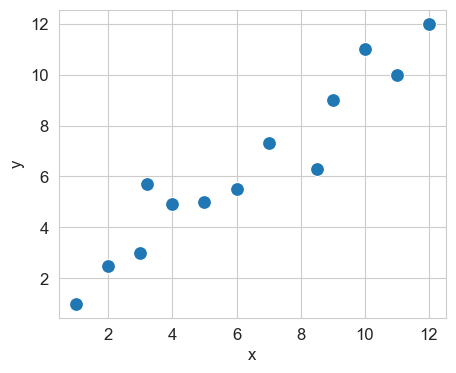

In [116]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='x',y='y', data=df, s=100)
plt.show()